In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#supervised model building part-- classification model
#independent and dependent data
#divide the data into train and test set
#create your model
#train your model
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

In [3]:
# importing the data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



**age**: the age of the patient in years.

**sex**: the sex of the patient (1 = male, 0 = female).

**cp**: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

**trestbps**: the resting blood pressure of the patient in mm Hg.

**chol**: the serum cholesterol level of the patient in mg/dl.

**fbs**: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

**restecg**: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

**thalach**: the maximum heart rate achieved by the patient during exercise.
exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

**oldpeak**: the ST depression induced by exercise relative to rest.
slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest
Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

**ca**: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

**thal**: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

target: the presence of heart disease in the patient (0 = no disease, 1 = disease present).





In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Data is manipulated by several things:
# Null values
# duplicate values

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
# To check how many people have heart disease and how many don't have

df["target"].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [12]:
# Check for high cholestrol >200

df[df["chol"] > 200].shape

(252, 14)

In [17]:
# How many people have high cholestrol level and have heart disease

df[(df["chol"] > 200) & (df["target"] == 1)].shape

(135, 14)

In [14]:
(135/252) * 100

53.57142857142857

In [15]:
# 54% of people having high cholestrol prone to have a heart disease also

In [19]:
# How many people above 45 age have high cholestrol and have heart disease

df[(df["chol"] > 200) & (df["target"] == 1) & (df["age"] > 45)].shape


(99, 14)

In [25]:
# Checking for males v/s females 1 = male, 0 = female

males = df[(df["age"] > 45) & (df["sex"] == 1) ].shape
males

(161, 14)

In [26]:
males_with_HD = df[(df["age"] > 45) & (df["sex"] == 1) & (df["target"] == 1)].shape
males_with_HD

(62, 14)

In [31]:
(62/161) * 100

38.50931677018634

In [29]:
females = df[(df["age"] > 45) & (df["sex"] == 0) ].shape
females

(78, 14)

In [30]:
females_with_HD = df[(df["age"] > 45) & (df["sex"] == 0)  & (df["target"] == 1)].shape
females_with_HD

(55, 14)

In [32]:
(55/78) * 100

70.51282051282051

In [33]:
# Aged females are more prone to have a heart disease

In [34]:
# Correlation

df.corr(numeric_only = True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

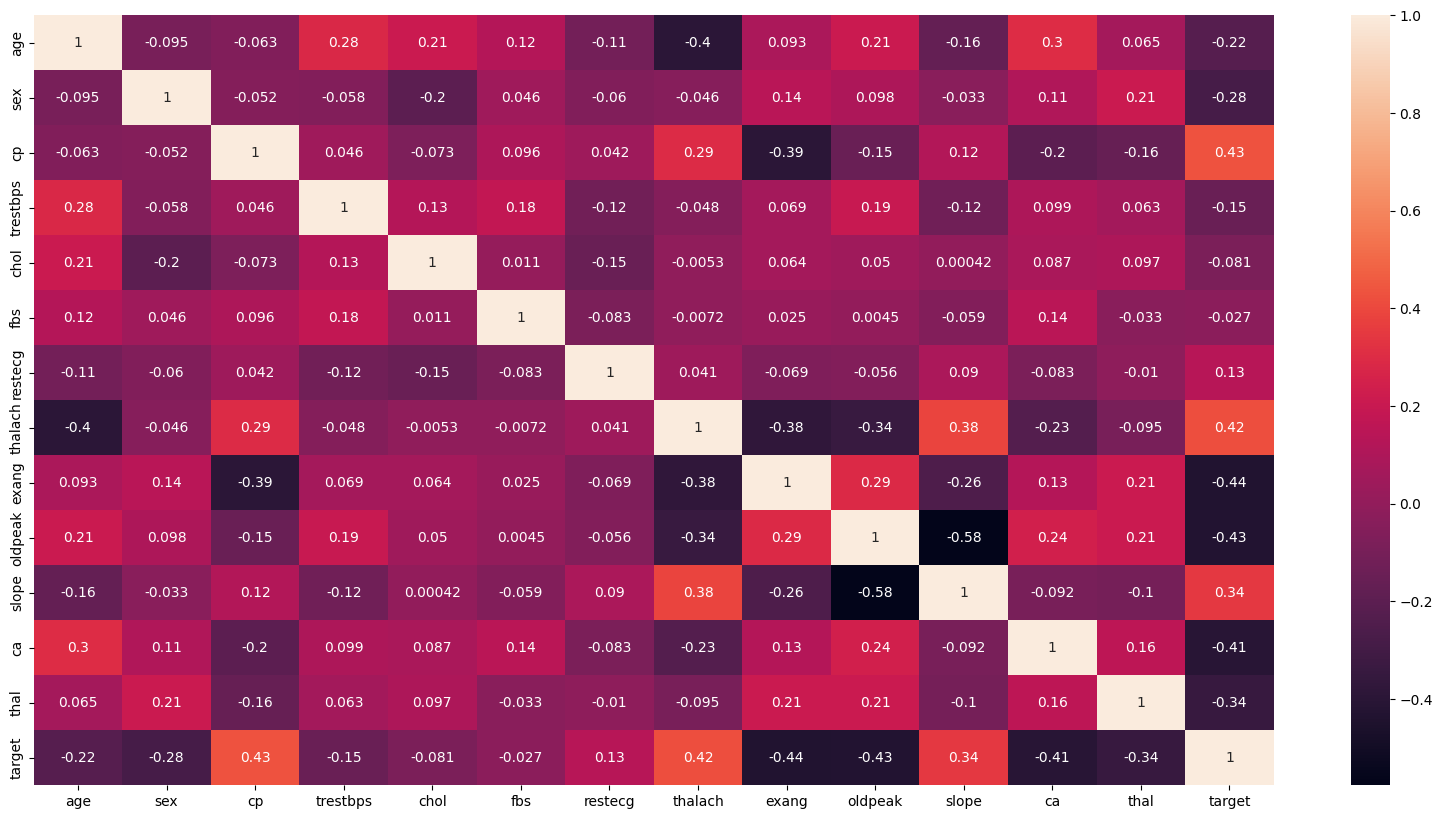

In [36]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [37]:
# To check distribution of data

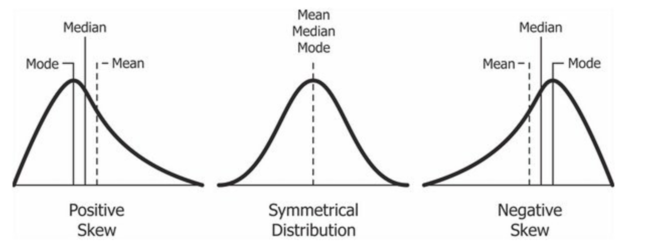

Text(0.5, 1.0, 'Age distribuition')

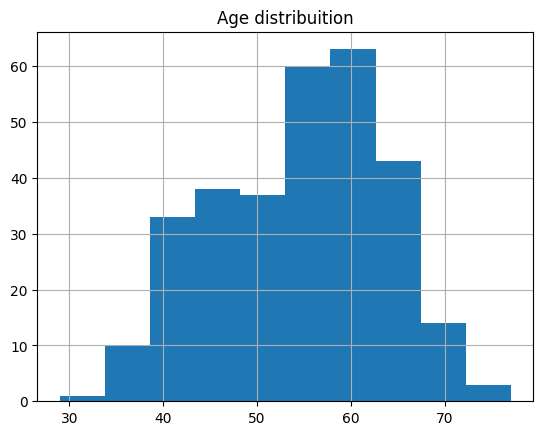

In [38]:
# histplot, distplot, kdeplot

df['age'].hist(grid=True, bins=10)
plt.title('Age distribuition')

<ipython-input-39-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

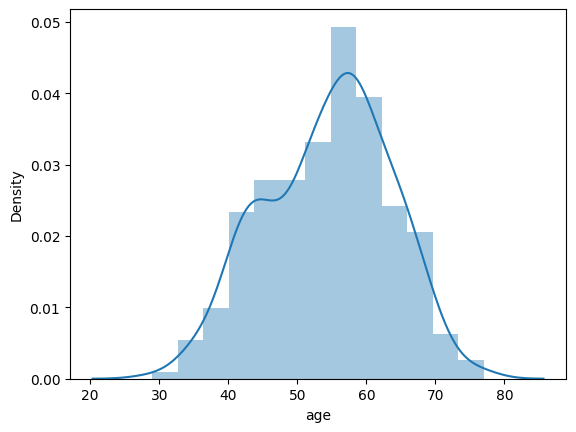

In [39]:
sns.distplot(df['age'])

<Axes: xlabel='age', ylabel='Density'>

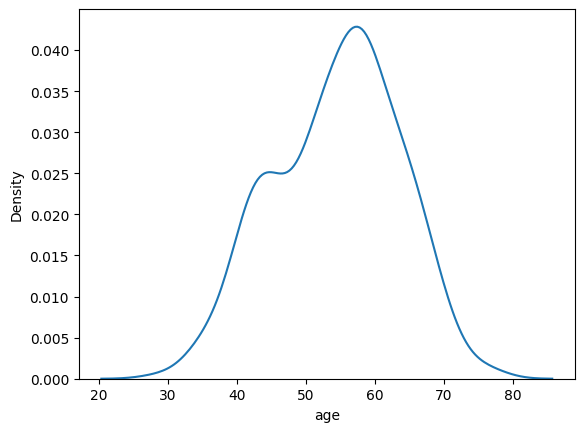

In [41]:
sns.kdeplot(df['age'])  # kernel density estimation

<ipython-input-42-3cff343805c6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],  label='Male')
<ipython-input-42-3cff343805c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'], label='Female')


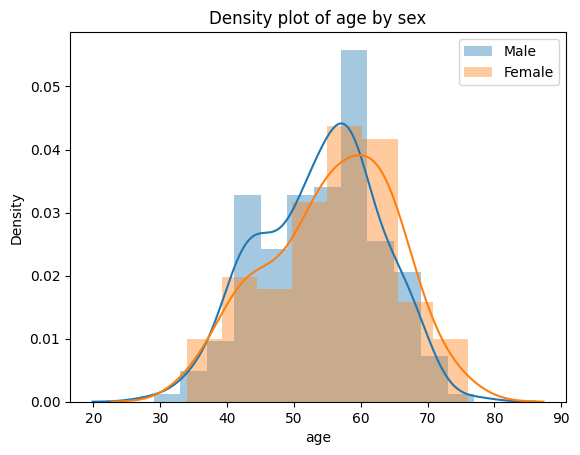

In [42]:
sns.distplot(df[df['sex']==1]['age'],  label='Male')
sns.distplot(df[df['sex']==0]['age'], label='Female')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


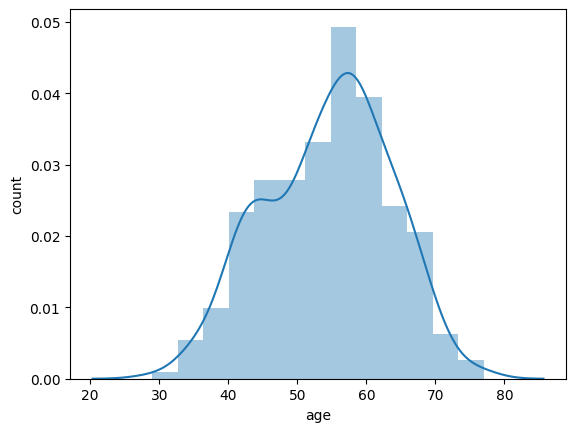

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


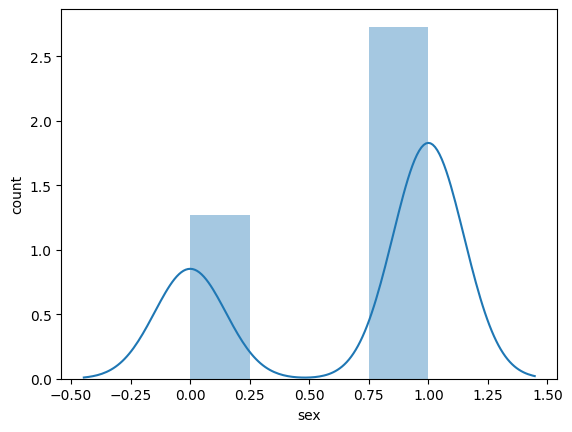

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


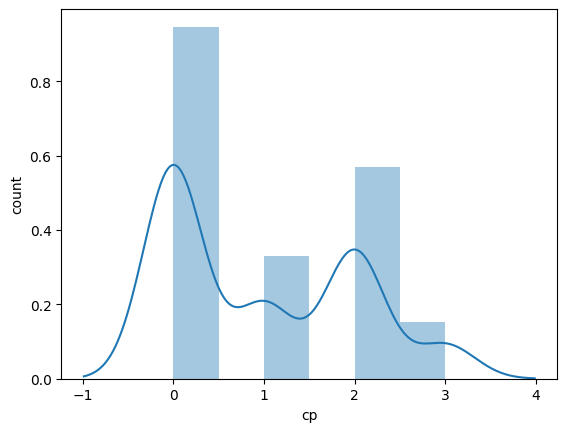

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


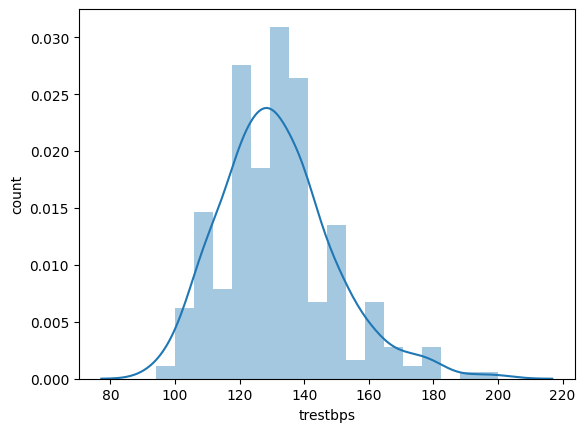

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


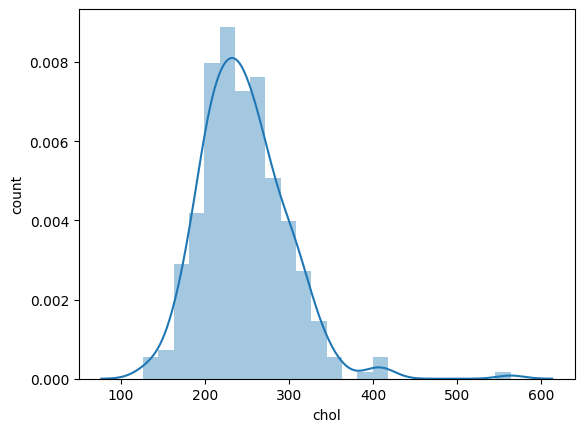

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


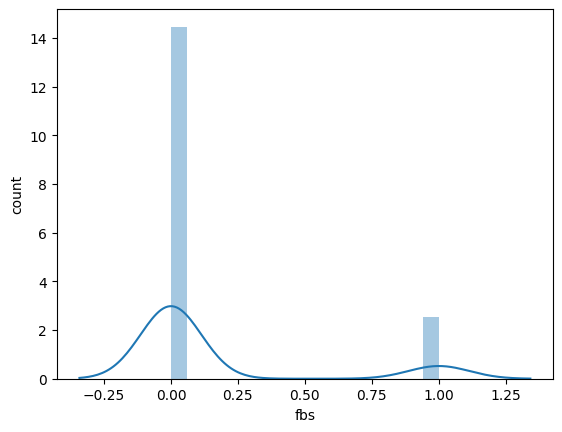

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


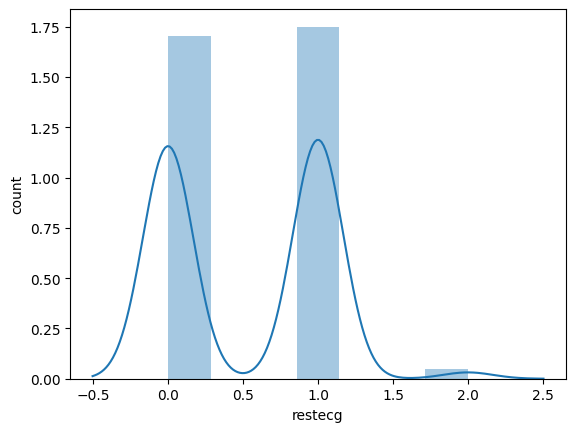

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


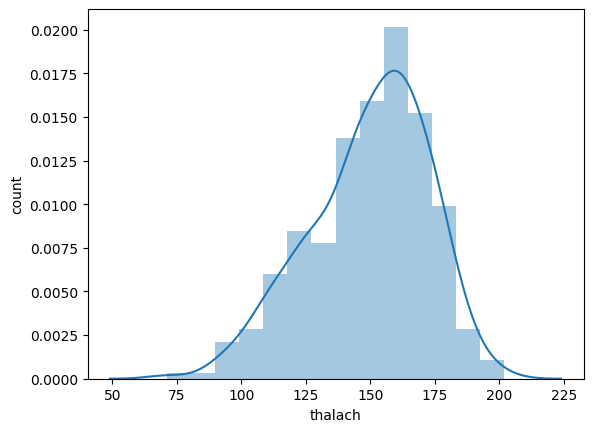

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


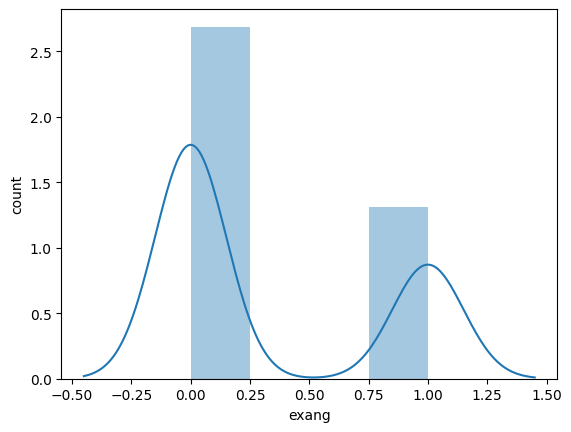

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


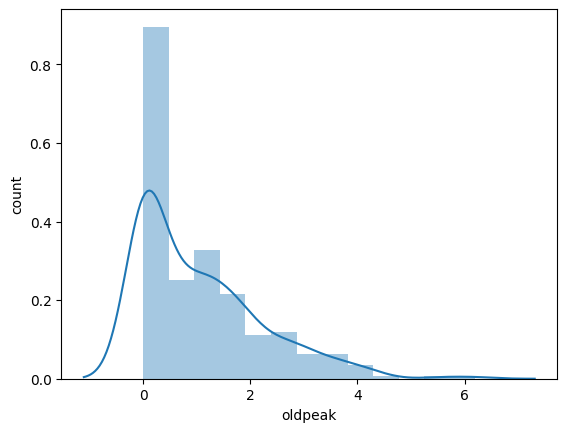

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


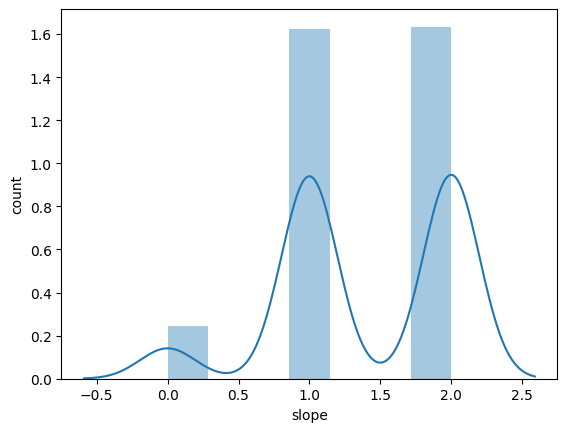

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


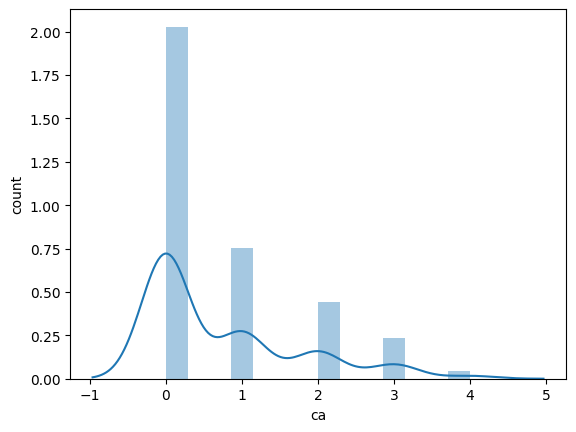

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


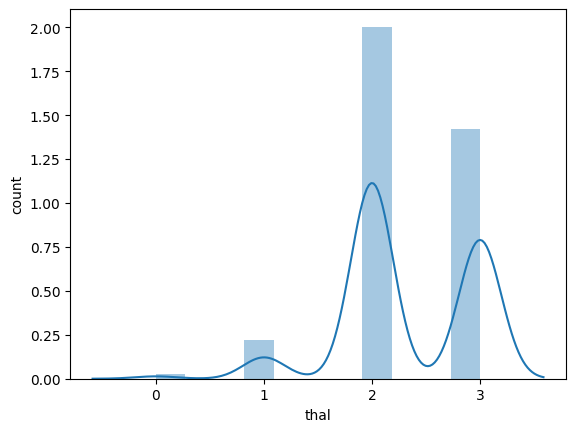

<ipython-input-46-81172b44a1b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name])


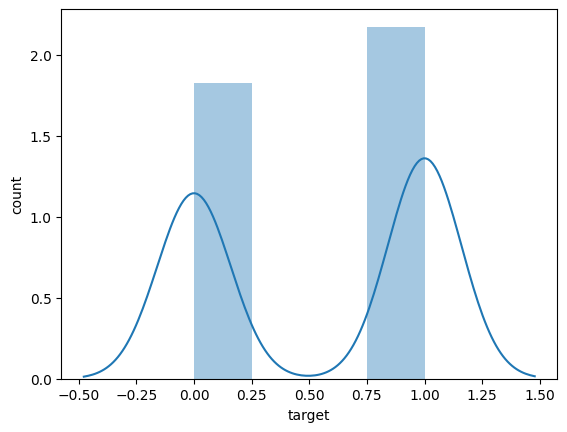

In [46]:
col= df.columns
for col_name in col:
   sns.distplot(df[col_name])
   plt.xlabel(col_name)
   plt.ylabel("count")
   plt.show()


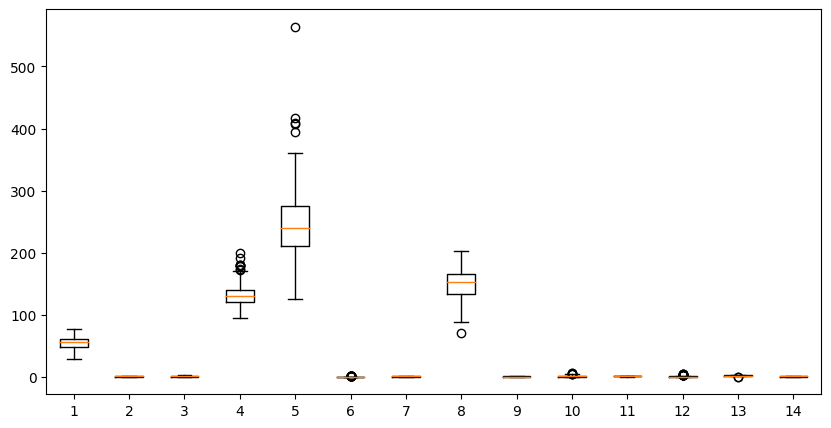

In [48]:
plt.figure(figsize=(10,5))
plt.boxplot(df)
plt.show()


In [49]:
import plotly.express as px
col_list=list(df.columns)

for i in col_list:
  if(df[i].dtype !='object'):
    fig=px.box(df[i])
    fig.show()


In [50]:
for i in df.columns:
    if df[i].dtype != 'object':
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        data = df[(df[i]>=Q1-1.5*IQR) & (df[i]<= Q3+1.5*IQR)]


In [51]:
import plotly.express as px
col_list=list(df.columns)

for i in col_list:
  if(df[i].dtype !='object'):
    fig=px.box(df[i])
    fig.show()


In [52]:
X = df.iloc[:, :-1]#independent variable should always be in a dataframe format(2D) data
y = df['target']#dependent or target value
print(X.shape)
print(y.shape)

(302, 13)
(302,)


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=5, train_size=0.70)
print(x_train.shape)
print(x_test.shape)

(211, 13)
(91, 13)


In [54]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [55]:
y_test_pred = clf.predict(x_test)
y_test_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1])

In [56]:
y_test # actual values

68     1
159    1
268    0
200    0
24     1
      ..
154    1
2      1
90     1
23     1
3      1
Name: target, Length: 91, dtype: int64

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test_pred,y_test)

0.7692307692307693

# Hyperparameter tuning

In [58]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

param_grid = {
  "max_depth" : [None,1,2,3,4,5,10],
  "min_samples_split" : [2,5,10],
  "min_samples_leaf" : [1,2,4],
  "criterion" : ["gini", "entropy" ]
}

grid_search = GridSearchCV(clf, param_grid )
grid_search.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [59]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [60]:
clf2 = DecisionTreeClassifier(random_state = 0,criterion= 'gini', max_depth= 3, min_samples_leaf= 1, min_samples_split= 5) #we are creating a decision tree model which is untrained
clf2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=0)

In [61]:
y_test_pred = clf2.predict(x_test)

In [62]:
accuracy_score(y_test_pred,y_test)

0.8681318681318682

[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.495\nsamples = 211\nvalue = [95, 116]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.409\nsamples = 101\nvalue = [72, 29]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.499\nsamples = 48\nvalue = [23, 25]'),
 Text(0.0625, 0.125, 'gini = 0.4\nsamples = 29\nvalue = [8, 21]'),
 Text(0.1875, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.14\nsamples = 53\nvalue = [49, 4]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.4375, 0.125, 'gini = 0.078\nsamples = 49\nvalue = [47, 2]'),
 Text(0.75, 0.625, 'x[11] <= 0.5\ngini = 0.331\nsamples = 110\nvalue = [23, 87]'),
 Text(0.625, 0.375, 'x[9] <= 1.7\ngini = 0.171\nsamples = 74\nvalue = [7, 67]'),
 Text(0.5625, 0.125, 'gini = 0.091\nsamples = 63\nvalue = [3, 60]'),
 Text(0.6875, 0.125, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.875, 0.375, 'x[9] <= 1.9\ngini = 0.494\nsamples = 36\nvalue = [16, 20]'),
 Text(0.8125, 0.1

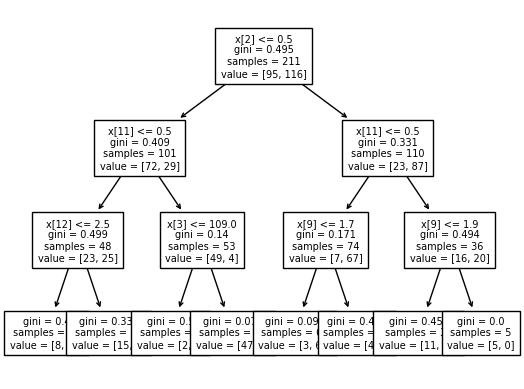

In [65]:
from sklearn import tree
tree.plot_tree(clf2, fontsize = 7)

In [66]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
